In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras import metrics
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Flatten

from nltk import word_tokenize, pos_tag, chunk
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from pprint import pprint
import pandas as pd
import numpy as np

from keras import optimizers
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.constraints import maxnorm
from keras.layers import Dropout
import os

In [2]:
filename = './25_cleaned_job_descriptions.csv'
data = pd.read_csv(filename, header = 0, names = ['Query', 'Description'])

In [3]:
data.shape

(10000, 2)

In [117]:
data[data['Query'] == 'Data Analyst']

,Query,Description
0,Data Scientist,job description junior data scientist ibm work...
1,Data Scientist,overall summary data scientist data science so...
2,Data Scientist,team data science team newly formed applied re...
3,Data Scientist,need junior data scientist ny area remote succ...
4,Data Scientist,want help guide core business spotify using in...
...,...,...
9995,Network Architect,opportunity customer understand digital transf...
9996,Network Architect,nasa ames research center ha requirement senio...
9997,Network Architect,'ll distinguished engineer proven technology l...
9998,Network Architect,software development engineer full stack – ent...


In [5]:
data['Query'].unique()

array(['Data Scientist', 'Data Analyst', 'Data Architect',
       'Data Engineer', 'Statistics', 'Database Administrator',
       'Business Analyst', 'Data and Analytics Manager',
       'Machine Learning', 'Artificial Intelligence', 'Deep Learning',
       'Business Intelligence Analyst', 'Data Visualization Expert',
       'Data Quality Manager', 'Big Data Engineer', 'Data Warehousing',
       'Technology Integration', 'IT Consultant',
       'IT Systems Administrator', 'Cloud Architect',
       'Technical Operations', 'Cloud Services Developer',
       'Full Stack Developer', 'Information Security Analyst',
       'Network Architect'], dtype=object)

In [6]:
data['Query'].unique().shape

(25,)

In [7]:
train, test = train_test_split(data, test_size = 0.2)

train_descs = train['Description']
train_labels = train['Query']
 
test_descs = test['Description']
test_labels = test['Query']

In [8]:
num_labels = len(train_labels.unique().tolist())
vocab_size = 1000
batch_size = 32
nb_epoch = 100

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_descs)
x_train = tokenizer.texts_to_matrix(train_descs, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_descs, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

In [9]:
model = Sequential()
model.add(Dense(8192, input_shape=(vocab_size,), activation = 'relu', kernel_initializer = 'glorot_normal', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.8))
model.add(Dense(2048, kernel_initializer = 'glorot_normal', activation= 'relu'))
model.add(Dropout(0.8))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
    
# Compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = [metrics.categorical_accuracy, 'accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              8200192   
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                51225     
_________________________________________________________________
activation (Activation)      (None, 25)                0         
Total params: 25,030,681
Trainable params: 25,030,681
Non-trainable params: 0
____________________________________________

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/100
225/225 [==============================] - 3s 9ms/step - loss: 4.1752 - categorical_accuracy: 0.0653 - accuracy: 0.0653 - val_loss: 2.7980 - val_categorical_accuracy: 0.3862 - val_accuracy: 0.3862
Epoch 2/100
225/225 [==============================] - 1s 6ms/step - loss: 2.9841 - categorical_accuracy: 0.1643 - accuracy: 0.1643 - val_loss: 2.5120 - val_categorical_accuracy: 0.4575 - val_accuracy: 0.4575
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 2.5929 - categorical_accuracy: 0.2557 - accuracy: 0.2557 - val_loss: 2.2040 - val_categorical_accuracy: 0.4737 - val_accuracy: 0.4737
Epoch 4/100
225/225 [==============================] - 1s 6ms/step - loss: 2.3161 - categorical_accuracy: 0.3198 - accuracy: 0.3198 - val_loss: 1.9838 - val_categorical_accuracy: 0.5075 - val_accuracy: 0.5075
Epoch 5/100
225/225 [==============================] - 1s 6ms/step - loss: 2.1255 - categorical_accuracy: 0.3738 - accuracy: 0.3738 - val_loss: 1.8302 - val_categor

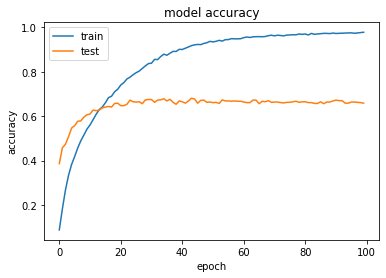

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

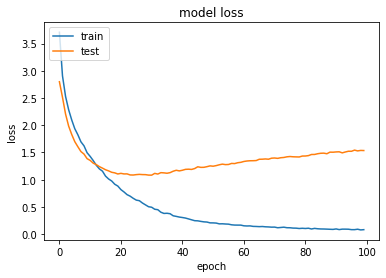

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('\nTest categorical_crossentropy:', score[0])
print('Categorical accuracy:', score[1])
print('Accuracy:', score[2])

63/63 [==============================] - 0s 3ms/step - loss: 1.5584 - categorical_accuracy: 0.6620 - accuracy: 0.6620

Test categorical_crossentropy: 1.5584089756011963
Categorical accuracy: 0.6620000004768372
Accuracy: 0.6620000004768372


In [132]:
desc1 = input()

mathematics


In [133]:
desc = desc1
desc

'mathematics'

In [134]:
encoded_docs = [one_hot(desc, vocab_size)]

In [135]:
padded_text = pad_sequences(encoded_docs, vocab_size, padding='post')

In [136]:
pred = model.predict(padded_text)

In [137]:
encoder = LabelBinarizer()
encoder.fit(test_labels)
result = encoder.inverse_transform(pred)

In [139]:
result[0]

'Statistics'

In [64]:
import tensorflow as tf

In [65]:
tf.saved_model.save(model, './')

INFO:tensorflow:Assets written to: ./assets


In [66]:
converter = tf.lite.TFLiteConverter.from_saved_model('./')
tflite_model = converter.convert()

In [67]:
import pathlib

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

100124396